___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Linear Regression Project Exercise 

Now that we have learned about feature engineering, cross validation, and grid search, let's test all your new skills with a project exercise in Machine Learning. This exercise will have a more guided approach, later on the ML projects will begin to be more open-ended. We'll start off with using the final version of the Ames Housing dataset we worked on through the feature engineering section of the course. Your goal will be to create a Linear Regression Model, train it on the data with the optimal parameters using a grid search, and then evaluate the model's capabilities on a test set.

---
---
---
## Complete the tasks in bold

**TASK: Run the cells under the Imports and Data section to make sure you have imported the correct general libraries as well as the correct datasets. Later on you may need to run further imports from scikit-learn.**

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error, SCORERS
import scipy as sp
from joblib import dump,load
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV, ElasticNet
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

### Data

In [3]:
df = pd.read_csv("../DATA/AMES_Final_DF.csv")

In [4]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


**TASK: The label we are trying to predict is the SalePrice column. Separate out the data into X features and y labels**

In [6]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

**TASK: Use scikit-learn to split up X and y into a training set and test set. Since we will later be using a Grid Search strategy, set your test proportion to 10%. To get the same data split as the solutions notebook, you can specify random_state = 101**

In [7]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1,
                                       random_state=101)

**TASK: The dataset features has a variety of scales and units. For optimal regression performance, scale the X features. Take carefuly note of what to use for .fit() vs what to use for .transform()**

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**TASK: We will use an Elastic Net model. Create an instance of default ElasticNet model with scikit-learn**

In [9]:
model = ElasticNet(max_iter=10000)

**TASK:  The Elastic Net model has two main parameters, alpha and the L1 ratio. Create a dictionary parameter grid of values for the ElasticNet. Feel free to play around with these values, keep in mind, you may not match up exactly with the solution choices**

In [10]:
param_grid = {'alpha':[0.01,0.1,0.15,0.175,0.195,0.199,0.2],
              'l1_ratio':[.99,0.991,0.9915,0.9975,0.995,0.999,1]}

**TASK: Using scikit-learn create a GridSearchCV object and run a grid search for the best parameters for your model based on your scaled training data. [In case you are curious about the warnings you may recieve for certain parameter combinations](https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge)**

In [12]:
grid_model = GridSearchCV(estimator=model, 
                          param_grid=param_grid, 
                          scoring='neg_mean_squared_error', 
                          cv=5, verbose=2)

grid_model.fit(X_train,y_train)

grid_model.best_estimator_

Fitting 5 folds for each of 49 candidates, totalling 245 fits


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.503e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.595e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.060e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.046e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.524e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.507e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.991; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.599e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.991; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.066e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.991; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.046e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.991; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.551e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.991; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.508e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.01, l1_ratio=0.9915; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.600e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.01, l1_ratio=0.9915; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.068e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.01, l1_ratio=0.9915; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.046e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.01, l1_ratio=0.9915; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.562e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.01, l1_ratio=0.9915; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.489e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.01, l1_ratio=0.9975; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.583e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.01, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.041e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.01, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.021e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.01, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.555e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.01, l1_ratio=0.9975; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.509e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.995; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.601e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.995; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.068e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.995; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.043e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.995; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.601e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.995; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.420e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.523e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.949e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.999; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.949e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.336e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.01, l1_ratio=0.999; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.564e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.01, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.927e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.01, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.900e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.01, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.915e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.01, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.648e+11, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.01, l1_ratio=1; total time=   1.7s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.1s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.1s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.1s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.3s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.0s
[CV] END ..........................alpha=0.1, l1_ratio=0.991; total time=   1.3s
[CV] END ..........................alpha=0.1, l1_ratio=0.991; total time=   1.3s
[CV] END ..........................alpha=0.1, l1_ratio=0.991; total time=   1.2s
[CV] END ..........................alpha=0.1, l1_ratio=0.991; total time=   1.6s
[CV] END ..........................alpha=0.1, l1_ratio=0.991; total time=   1.2s
[CV] END .........................alpha=0.1, l1_ratio=0.9915; total time=   1.3s
[CV] END ...................

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.994e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.1, l1_ratio=0.9975; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.160e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.1, l1_ratio=0.9975; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.918e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.1, l1_ratio=0.9975; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.671e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.1, l1_ratio=0.9975; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+10, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.1, l1_ratio=0.9975; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.941e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.1, l1_ratio=0.995; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.164e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.1, l1_ratio=0.995; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.633e+10, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.1, l1_ratio=0.995; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.514e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.1, l1_ratio=0.995; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+09, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.1, l1_ratio=0.995; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.870e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.1, l1_ratio=0.999; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.138e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.1, l1_ratio=0.999; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.220e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.1, l1_ratio=0.999; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.616e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.1, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.482e+10, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.1, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.635e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.907e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.810e+10, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.078e+10, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.763e+10, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   1.7s
[CV] END ..........................alpha=0.15, l1_ratio=0.99; total time=   0.7s
[CV] END ..........................alpha=0.15, l1_ratio=0.99; total time=   0.7s
[CV] END ..........................alpha=0.15, l1_ratio=0.99; total time=   0.8s
[CV] END ..........................alpha=0.15, l1_ratio=0.99; total time=   0.9s
[CV] END ..........................alpha=0.15, l1_ratio=0.99; total time=   0.7s
[CV] END .........................alpha=0.15, l1_ratio=0.991; total time=   0.8s
[CV] END .........................alpha=0.15, l1_ratio=0.991; total time=   0.8s
[CV] END .........................alpha=0.15, l1_ratio=0.991; total time=   0.8s
[CV] END .........................alpha=0.15, l1_ratio=0.991; total time=   1.0s
[CV] END .........................alpha=0.15, l1_ratio=0.991; total time=   0.7s
[CV] END ........................alpha=0.15, l1_ratio=0.9915; total time=   0.8s
[CV] END ...................

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.196e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.15, l1_ratio=0.9975; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.15, l1_ratio=0.9975; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.016e+10, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.15, l1_ratio=0.9975; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.293e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.15, l1_ratio=0.9975; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.740e+09, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.15, l1_ratio=0.9975; total time=   1.7s
[CV] END .........................alpha=0.15, l1_ratio=0.995; total time=   1.4s
[CV] END .........................alpha=0.15, l1_ratio=0.995; total time=   1.4s
[CV] END .........................alpha=0.15, l1_ratio=0.995; total time=   1.3s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e+09, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.15, l1_ratio=0.995; total time=   1.7s
[CV] END .........................alpha=0.15, l1_ratio=0.995; total time=   1.2s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.197e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.15, l1_ratio=0.999; total time=   1.5s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.473e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.15, l1_ratio=0.999; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.15, l1_ratio=0.999; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.135e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.15, l1_ratio=0.999; total time=   1.5s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.403e+09, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.15, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.111e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.15, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.910e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.15, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.567e+10, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.15, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.459e+10, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.15, l1_ratio=1; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.102e+10, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=0.15, l1_ratio=1; total time=   1.7s
[CV] END .........................alpha=0.175, l1_ratio=0.99; total time=   0.6s
[CV] END .........................alpha=0.175, l1_ratio=0.99; total time=   0.6s
[CV] END .........................alpha=0.175, l1_ratio=0.99; total time=   0.6s
[CV] END .........................alpha=0.175, l1_ratio=0.99; total time=   0.8s
[CV] END .........................alpha=0.175, l1_ratio=0.99; total time=   0.6s
[CV] END ........................alpha=0.175, l1_ratio=0.991; total time=   0.7s
[CV] END ........................alpha=0.175, l1_ratio=0.991; total time=   0.7s
[CV] END ........................alpha=0.175, l1_ratio=0.991; total time=   0.7s
[CV] END ........................alpha=0.175, l1_ratio=0.991; total time=   0.8s
[CV] END ........................alpha=0.175, l1_ratio=0.991; total time=   0.6s
[CV] END .......................alpha=0.175, l1_ratio=0.9915; total time=   0.7s
[CV] END ...................

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.233e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.175, l1_ratio=0.9975; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.871e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.175, l1_ratio=0.9975; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.792e+10, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.175, l1_ratio=0.9975; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.749e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.175, l1_ratio=0.9975; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.264e+09, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.175, l1_ratio=0.9975; total time=   1.7s
[CV] END ........................alpha=0.175, l1_ratio=0.995; total time=   1.2s
[CV] END ........................alpha=0.175, l1_ratio=0.995; total time=   1.3s
[CV] END ........................alpha=0.175, l1_ratio=0.995; total time=   1.2s
[CV] END ........................alpha=0.175, l1_ratio=0.995; total time=   1.5s
[CV] END ........................alpha=0.175, l1_ratio=0.995; total time=   1.1s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.421e+11, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.175, l1_ratio=0.999; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+11, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.175, l1_ratio=0.999; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.175, l1_ratio=0.999; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.668e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.175, l1_ratio=0.999; total time=   1.5s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.665e+09, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.175, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.112e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.175, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.016e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.175, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+10, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.175, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.461e+10, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.175, l1_ratio=1; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.643e+10, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.175, l1_ratio=1; total time=   1.7s
[CV] END .........................alpha=0.195, l1_ratio=0.99; total time=   0.6s
[CV] END .........................alpha=0.195, l1_ratio=0.99; total time=   0.6s
[CV] END .........................alpha=0.195, l1_ratio=0.99; total time=   0.6s
[CV] END .........................alpha=0.195, l1_ratio=0.99; total time=   0.7s
[CV] END .........................alpha=0.195, l1_ratio=0.99; total time=   0.5s
[CV] END ........................alpha=0.195, l1_ratio=0.991; total time=   0.6s
[CV] END ........................alpha=0.195, l1_ratio=0.991; total time=   0.7s
[CV] END ........................alpha=0.195, l1_ratio=0.991; total time=   0.6s
[CV] END ........................alpha=0.195, l1_ratio=0.991; total time=   0.7s
[CV] END ........................alpha=0.195, l1_ratio=0.991; total time=   0.6s
[CV] END .......................alpha=0.195, l1_ratio=0.9915; total time=   0.7s
[CV] END ...................

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.195, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.195, l1_ratio=0.9975; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.059e+09, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.195, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.389e+10, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.195, l1_ratio=0.9975; total time=   1.8s
[CV] END .......................alpha=0.195, l1_ratio=0.9975; total time=   1.8s
[CV] END ........................alpha=0.195, l1_ratio=0.995; total time=   1.3s
[CV] END ........................alpha=0.195, l1_ratio=0.995; total time=   1.2s
[CV] END ........................alpha=0.195, l1_ratio=0.995; total time=   1.2s
[CV] END ........................alpha=0.195, l1_ratio=0.995; total time=   1.5s
[CV] END ........................alpha=0.195, l1_ratio=0.995; total time=   1.1s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.920e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.195, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.399e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.195, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.074e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.195, l1_ratio=0.999; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.971e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.195, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.575e+09, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.195, l1_ratio=0.999; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.113e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.195, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.466e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.195, l1_ratio=1; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.569e+10, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.195, l1_ratio=1; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.462e+10, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.195, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+10, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.195, l1_ratio=1; total time=   1.8s
[CV] END .........................alpha=0.199, l1_ratio=0.99; total time=   0.6s
[CV] END .........................alpha=0.199, l1_ratio=0.99; total time=   0.6s
[CV] END .........................alpha=0.199, l1_ratio=0.99; total time=   0.6s
[CV] END .........................alpha=0.199, l1_ratio=0.99; total time=   0.7s
[CV] END .........................alpha=0.199, l1_ratio=0.99; total time=   0.6s
[CV] END ........................alpha=0.199, l1_ratio=0.991; total time=   0.7s
[CV] END ........................alpha=0.199, l1_ratio=0.991; total time=   0.7s
[CV] END ........................alpha=0.199, l1_ratio=0.991; total time=   0.7s
[CV] END ........................alpha=0.199, l1_ratio=0.991; total time=   0.8s
[CV] END ........................alpha=0.199, l1_ratio=0.991; total time=   0.6s
[CV] END .......................alpha=0.199, l1_ratio=0.9915; total time=   0.7s
[CV] END ...................

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.769e+09, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.199, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.199, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.664e+09, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.199, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.604e+10, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.199, l1_ratio=0.9975; total time=   1.7s
[CV] END .......................alpha=0.199, l1_ratio=0.9975; total time=   1.7s
[CV] END ........................alpha=0.199, l1_ratio=0.995; total time=   1.1s
[CV] END ........................alpha=0.199, l1_ratio=0.995; total time=   1.2s
[CV] END ........................alpha=0.199, l1_ratio=0.995; total time=   1.1s
[CV] END ........................alpha=0.199, l1_ratio=0.995; total time=   1.3s
[CV] END ........................alpha=0.199, l1_ratio=0.995; total time=   1.0s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.078e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.199, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.941e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.199, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.199, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.866e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.199, l1_ratio=0.999; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.307e+09, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.199, l1_ratio=0.999; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.114e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.199, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.369e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.199, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.570e+10, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.199, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.463e+10, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.199, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.326e+10, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.199, l1_ratio=1; total time=   1.8s
[CV] END ...........................alpha=0.2, l1_ratio=0.99; total time=   0.6s
[CV] END ...........................alpha=0.2, l1_ratio=0.99; total time=   0.6s
[CV] END ...........................alpha=0.2, l1_ratio=0.99; total time=   0.6s
[CV] END ...........................alpha=0.2, l1_ratio=0.99; total time=   0.7s
[CV] END ...........................alpha=0.2, l1_ratio=0.99; total time=   0.5s
[CV] END ..........................alpha=0.2, l1_ratio=0.991; total time=   0.7s
[CV] END ..........................alpha=0.2, l1_ratio=0.991; total time=   0.7s
[CV] END ..........................alpha=0.2, l1_ratio=0.991; total time=   0.7s
[CV] END ..........................alpha=0.2, l1_ratio=0.991; total time=   0.8s
[CV] END ..........................alpha=0.2, l1_ratio=0.991; total time=   0.6s
[CV] END .........................alpha=0.2, l1_ratio=0.9915; total time=   0.7s
[CV] END ...................

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.377e+09, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.2, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.2, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.422e+09, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.2, l1_ratio=0.9975; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.385e+10, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.2, l1_ratio=0.9975; total time=   1.7s
[CV] END .........................alpha=0.2, l1_ratio=0.9975; total time=   1.7s
[CV] END ..........................alpha=0.2, l1_ratio=0.995; total time=   1.1s
[CV] END ..........................alpha=0.2, l1_ratio=0.995; total time=   1.1s
[CV] END ..........................alpha=0.2, l1_ratio=0.995; total time=   1.1s
[CV] END ..........................alpha=0.2, l1_ratio=0.995; total time=   1.3s
[CV] END ..........................alpha=0.2, l1_ratio=0.995; total time=   1.0s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.419e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.2, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.314e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.2, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+11, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.2, l1_ratio=0.999; total time=   1.7s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+11, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.2, l1_ratio=0.999; total time=   1.6s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.248e+09, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.2, l1_ratio=0.999; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.114e+10, tolerance: 1.355e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.346e+10, tolerance: 1.308e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.570e+10, tolerance: 1.415e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   1.8s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.463e+10, tolerance: 1.438e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   1.9s


c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.315e+10, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   1.9s


ElasticNet(alpha=0.2, l1_ratio=0.99, max_iter=10000)

**TASK: Display the best combination of parameters for your model**

In [14]:
grid_model.best_params_

{'alpha': 0.2, 'l1_ratio': 0.99}

**TASK: Evaluate your model's performance on the unseen 10% scaled test set. In the solutions notebook we achieved an MAE of $\$$14149 and a RMSE of $\$$20532**

In [15]:
y_pred = grid_model.predict(X_test)

In [16]:
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print(MAE)
print(RMSE)

14504.918861311755
20820.86250052859


In [17]:
lasso_cv_model = LassoCV(eps=0.0001, n_alphas=1000,cv=5, max_iter=1000)

lasso_cv_model.fit(X_train,y_train)

test_pred = lasso_cv_model.predict(X_test)

MAE = mean_absolute_error(y_test, test_pred)
RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

print(MAE)
print(RMSE)

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1663540361.416504, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1739593042.5681152, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1736620742.451416, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\aguil\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: C

14187.137090892611
20557.010749326957


c:\Users\aguil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SalePrice'>

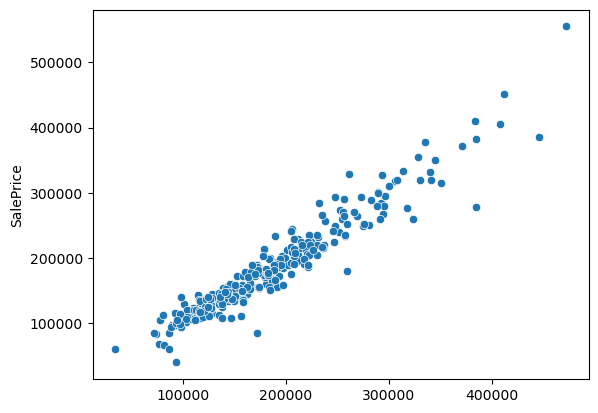

In [18]:
sns.scatterplot(test_pred,y_test)

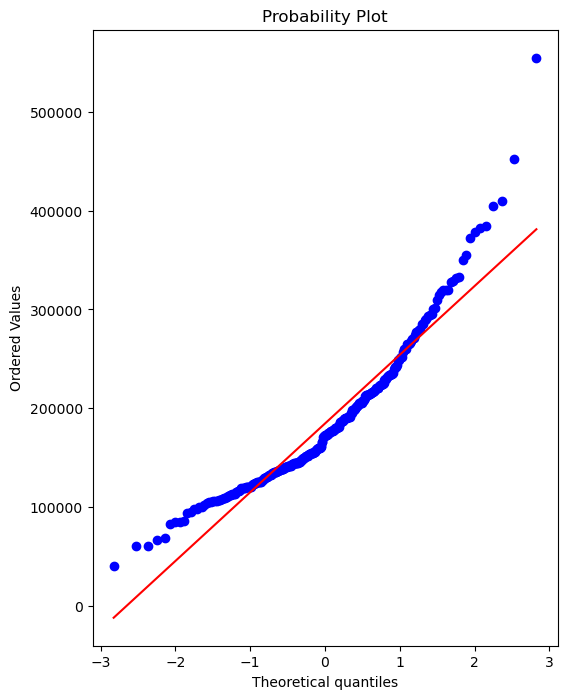

In [19]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

_ = sp.stats.probplot(y_test,plot=ax)

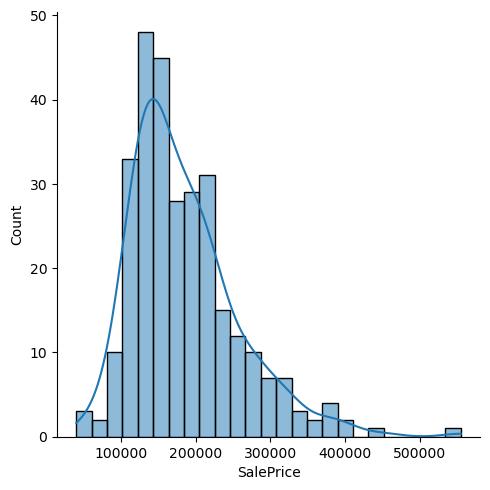

In [20]:
sns.displot(y_test,bins=25,kde=True)


## Great work!

----